### Hydrograph Plot 

[Saved] Figure saved to /home/ms6730/SBI_calibration/training _with_100_realizations_gage_1/second_round_training/hydrograph_plots/hydrograph_training_100_realizations_first_round_second_01608500.png


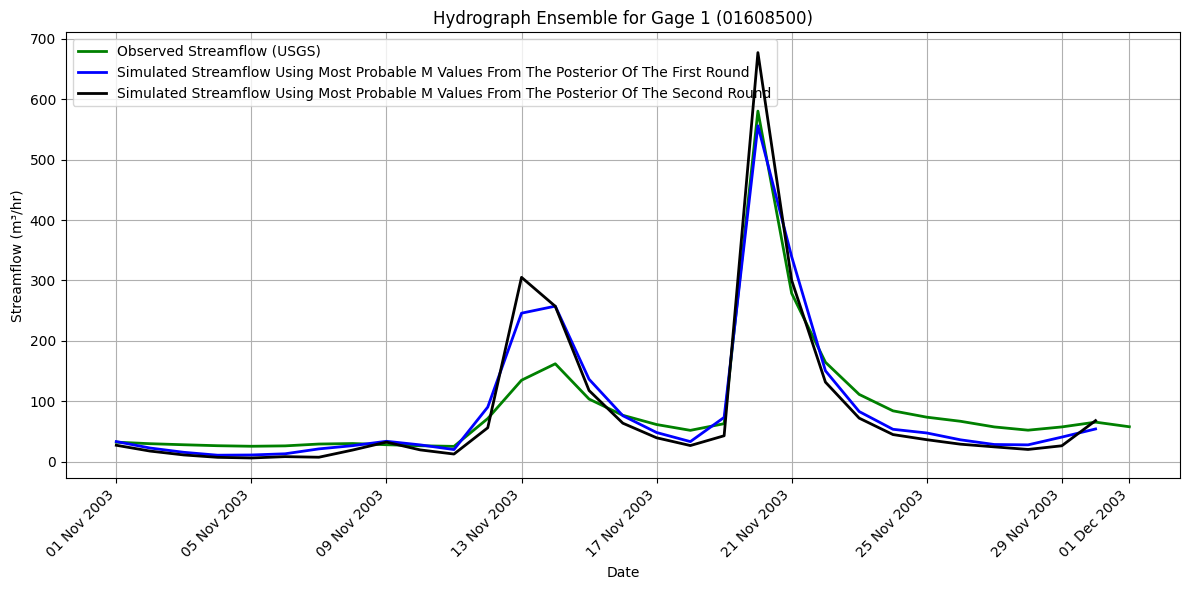

In [2]:
# ----------------------------------------------------
# Import Libraries 
# ----------------------------------------------------
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# ----------------------------------------------------
# Set Base Directory and Station ID
# ----------------------------------------------------
station_id = "01608500"

# ----------------------------------------------------
# Load Observed and Baseline Data
# ----------------------------------------------------
df_obs = pd.read_csv("/home/ms6730/SBI_calibration/training _with_100_realizations_gage_1/second_round_training/streamflow_excel/streamflow_daily_USGS.csv")
df_first_round = pd.read_csv("/home/ms6730/SBI_calibration/training _with_100_realizations_gage_1/second_round_training/streamflow_excel/streamflow_sim_100_sim_first_round.csv")
df_second_round = pd.read_csv("/home/ms6730/SBI_calibration/training _with_100_realizations_gage_1/second_round_training/streamflow_excel/streamflow_daily_second_round_training.csv")


# ----------------------------------------------------
# Convert and Align Date Columns and Drop First 5 Days
# ----------------------------------------------------
dates_obs = pd.to_datetime(df_obs["date"])[5:]
df_obs = df_obs.iloc[5:].reset_index(drop=True)

dates_first_round = pd.to_datetime(df_first_round["date"])[5:]
df_first_round = df_first_round.iloc[5:].reset_index(drop=True)

dates_second_round = pd.to_datetime(df_second_round["date"])[5:]
df_second_round = df_second_round.iloc[5:].reset_index(drop=True)


# Plot observed streamflow
plt.figure(figsize=(12, 6)) 
plt.plot(dates_obs, df_obs[station_id], color='green', linewidth=2, 
         label='Observed Streamflow (USGS)', zorder=10)
plt.plot(dates_first_round, df_first_round[station_id], color='blue', linewidth=2, 
         label='Simulated Streamflow Using Most Probable M Values From The Posterior Of The First Round', 
         zorder=10)
plt.plot(dates_second_round, df_second_round[station_id], color='black', linewidth=2, 
         label='Simulated Streamflow Using Most Probable M Values From The Posterior Of The Second Round', zorder=10)



# Titles and labels
plt.title(f"Hydrograph Ensemble for Gage 1 ({station_id})")
plt.xlabel("Date")
plt.ylabel("Streamflow (m³/hr)")
plt.legend(loc="upper left")
plt.grid(True)

# Format x-axis
locator = mdates.AutoDateLocator(minticks=6, maxticks=12)
formatter = mdates.DateFormatter('%d %b %Y')
plt.gca().xaxis.set_major_locator(locator)
plt.gca().xaxis.set_major_formatter(formatter)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# ----------------------------------------------------
# Save the Figure
# ----------------------------------------------------
output_path = "/home/ms6730/SBI_calibration/training _with_100_realizations_gage_1/second_round_training/hydrograph_plots/hydrograph_training_100_realizations_first_round_second_01608500.png"
plt.savefig(output_path, dpi=300, bbox_inches='tight')
print(f"[Saved] Figure saved to {output_path}")

# ----------------------------------------------------
# Show Plot
# ----------------------------------------------------
plt.show()
